In [2]:
%run '../dynamo_helper_functions.ipynb'

/tmp/ipykernel_2484607/3777615979.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


['/net/capricorn/home/xing/soh29/.conda/envs/dynamo_06_2024/lib/python3.8/site-packages/dynamo']


package umap-learn trimap    tqdm statsmodels setuptools seaborn   scipy  \
version      0.5.6  1.1.4  4.66.4      0.14.1     70.1.0  0.13.2  1.10.1   

package scikit-learn python-igraph pynndescent pre-commit pandas   numpy  \
version        1.3.2        0.11.5       0.5.8      3.5.0  1.2.0  1.23.0   

package numdifftools   numba networkx matplotlib loompy hdbscan  \
version       0.9.41  0.51.2      3.1      3.7.5  3.0.7  0.8.37   

package dynamo-release cvxopt colorcet  
version          1.0.0  1.3.2    3.1.0

In [3]:
from scipy.stats import gaussian_kde
from scipy.integrate import simps
from matplotlib.patches import Ellipse
from shapely import affinity
from matplotlib.patches import Polygon
from shapely.geometry.point import Point
from matplotlib.collections import PatchCollection

In [4]:
doses = [0,12,25,50,100,200,400,800]

In [5]:
# MCF10A data with density
same_ref_with_density = reload_data("../../data/static_MCF10A/generated_data/With_density/Same_Ref_With_Density_vf_", 
                                    '../../data/static_MCF10A/generated_data/With_density/uns_dict_')

## Percent area overlap

In [22]:
# Function to plot the ellipse
def plot_confidence_ellipse(mean, cov, ax, color, n_std=1.0,**kwargs):

    # Eigen decomposition of the covariance matrix
    eigvals, eigvecs = np.linalg.eigh(cov)
    
    # Calculate the angle of the ellipse
    angle = np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))
    
    # Calculate the width and height of the ellipse
    width, height = 2 * n_std * np.sqrt(eigvals)
    
    # Create the ellipse
    ellipse = Ellipse(xy=mean, color=color, width=width, height=height, angle=angle, **kwargs)
    
    ax.add_patch(ellipse)
    return ellipse

In [92]:
def returnEllipse(data, color, n_std=1.0, **kwargs):
    mean = np.mean(data, axis=0)
    cov = np.cov(data, rowvar=False)
    eigvals, eigvecs = np.linalg.eigh(cov)
    
    # Calculate the angle of the ellipse
    angle = np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))
    
    # Calculate the width and height of the ellipse
    width, height = 2 * n_std * np.sqrt(eigvals)

    # Create the ellipse
    ellipse = Ellipse(xy=mean, color=color, width=width, height=height, angle=angle, **kwargs)
    return ellipse

In [40]:
def create_ellipse(center, lengths, angle=0):
    """
    create a shapely ellipse. adapted from
    https://gis.stackexchange.com/a/243462
    """
    circ = Point(center).buffer(1)
    ell = affinity.scale(circ, int(lengths[0]/2), int(lengths[1]/2))
    ellr = affinity.rotate(ell, angle)
    return ellr

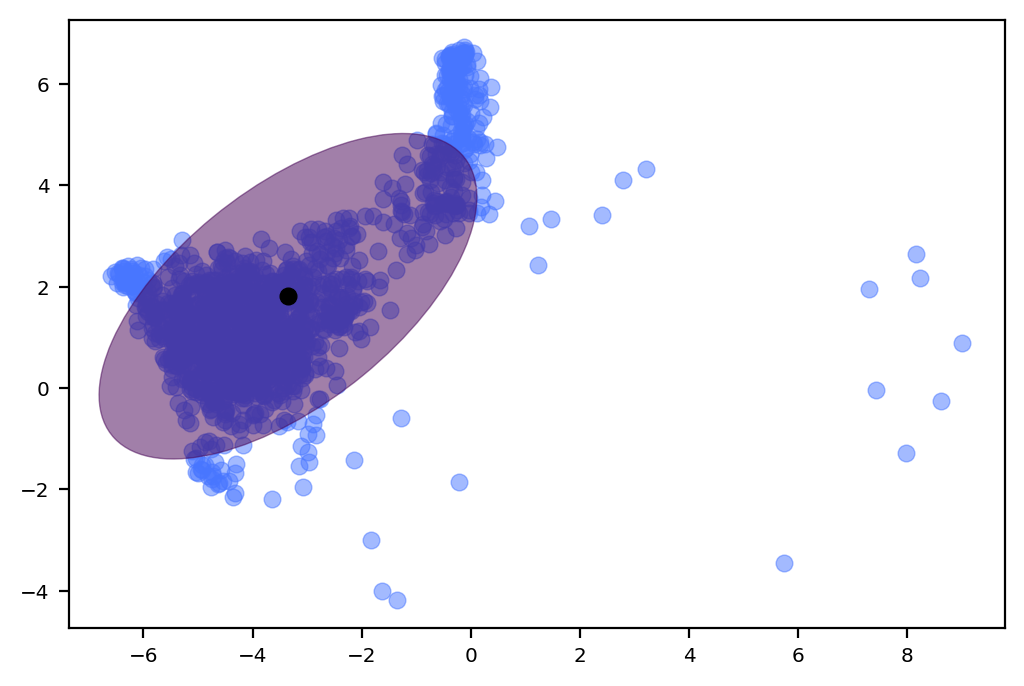

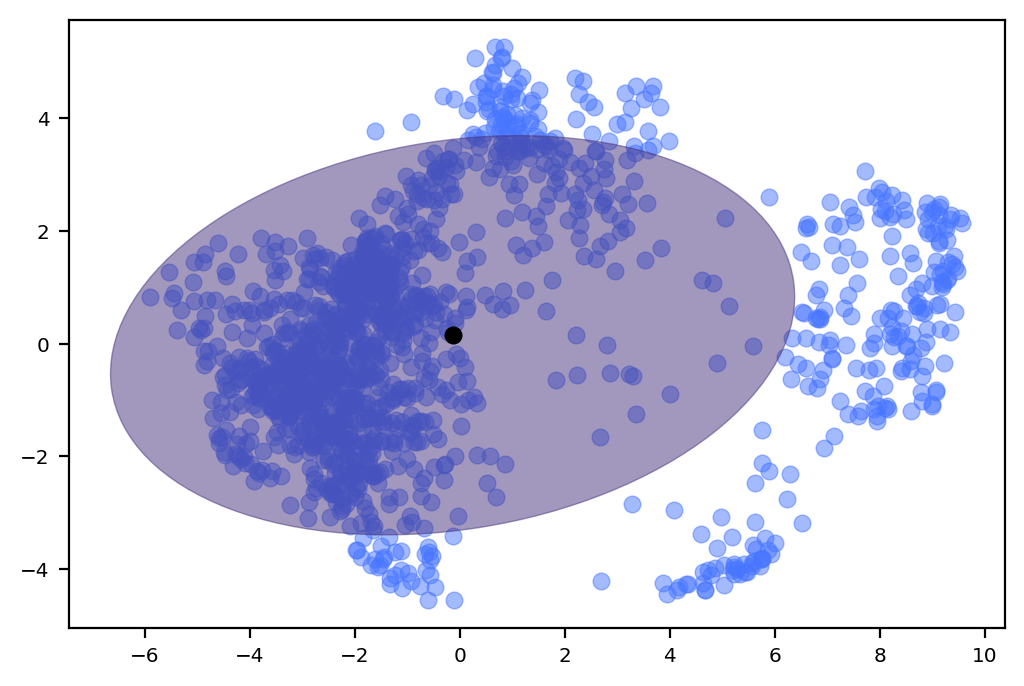

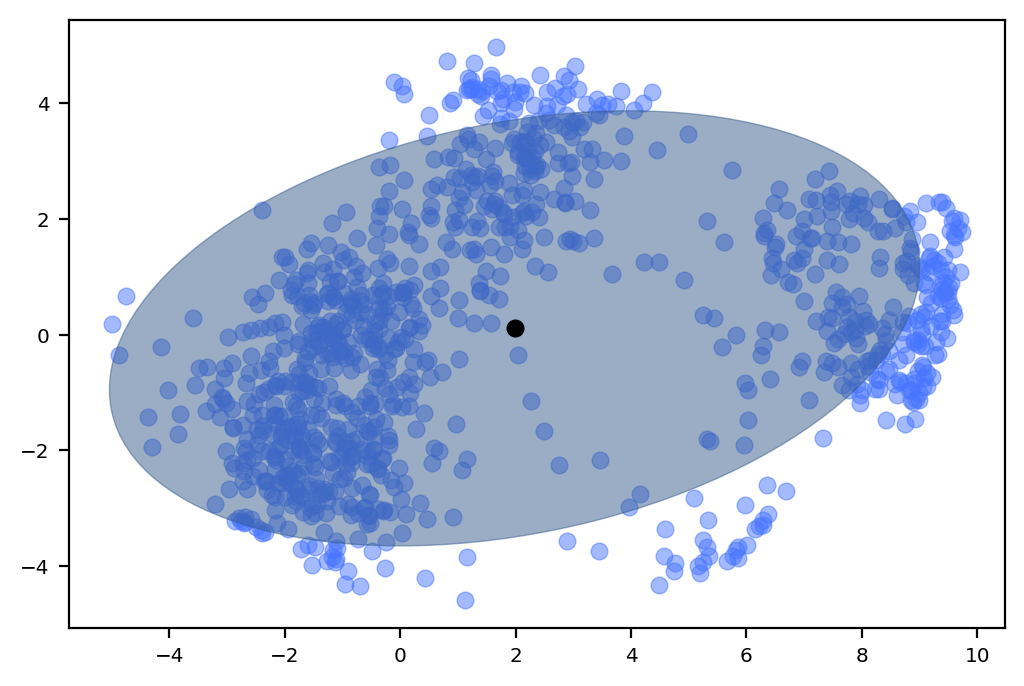

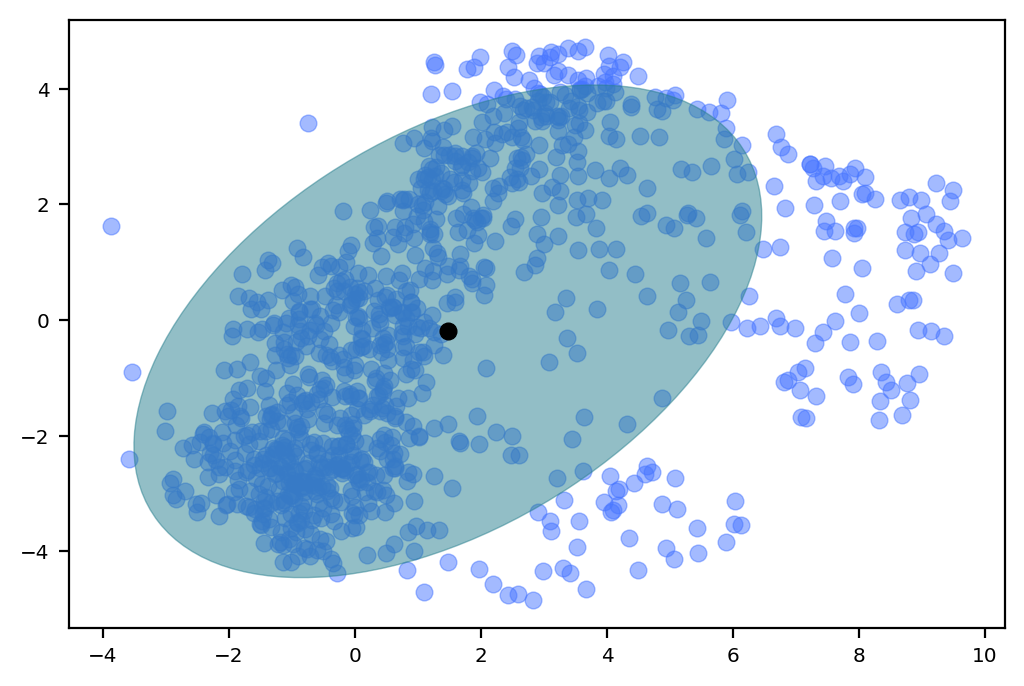

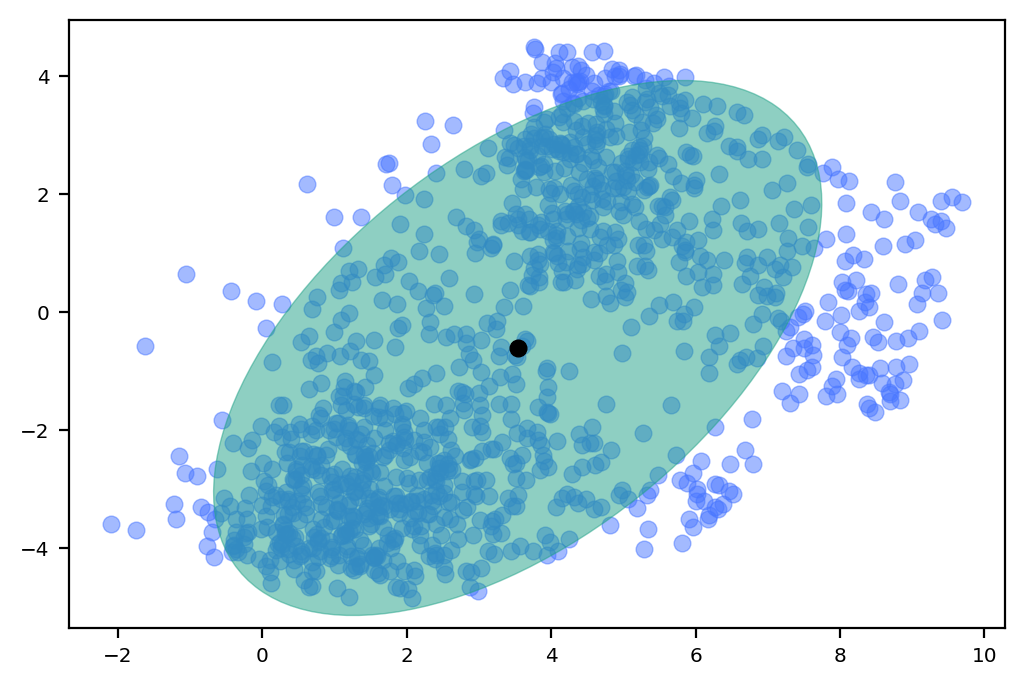

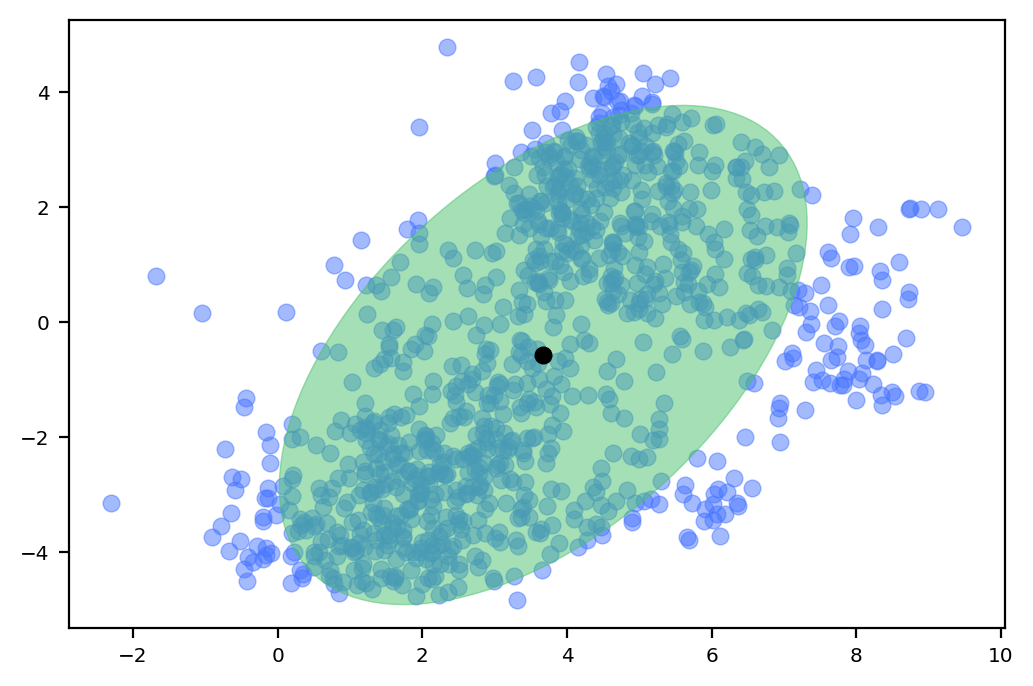

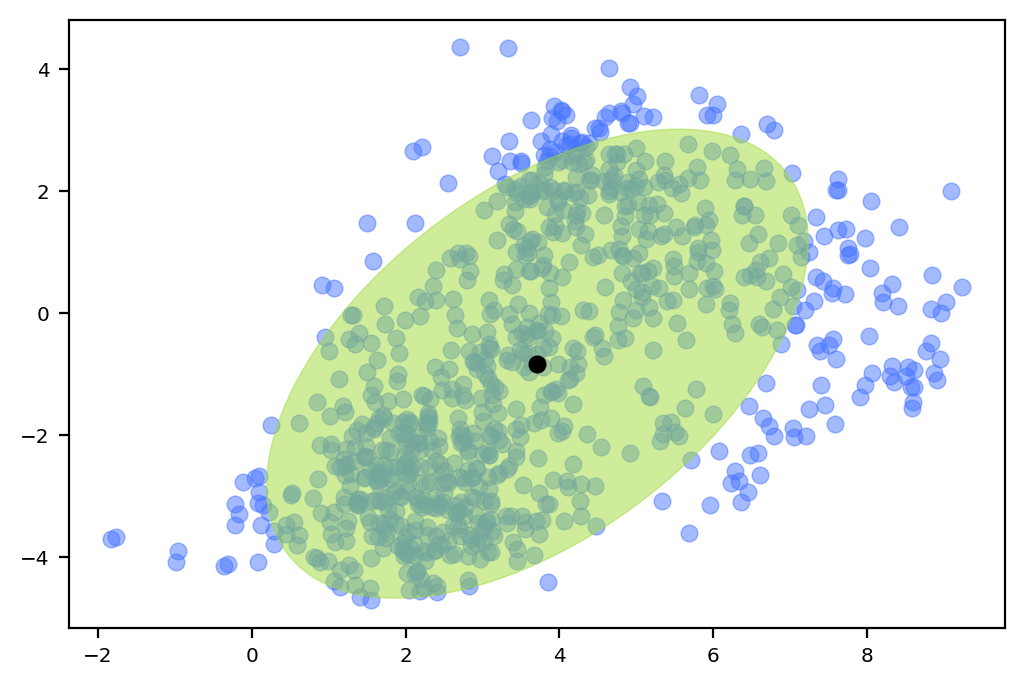

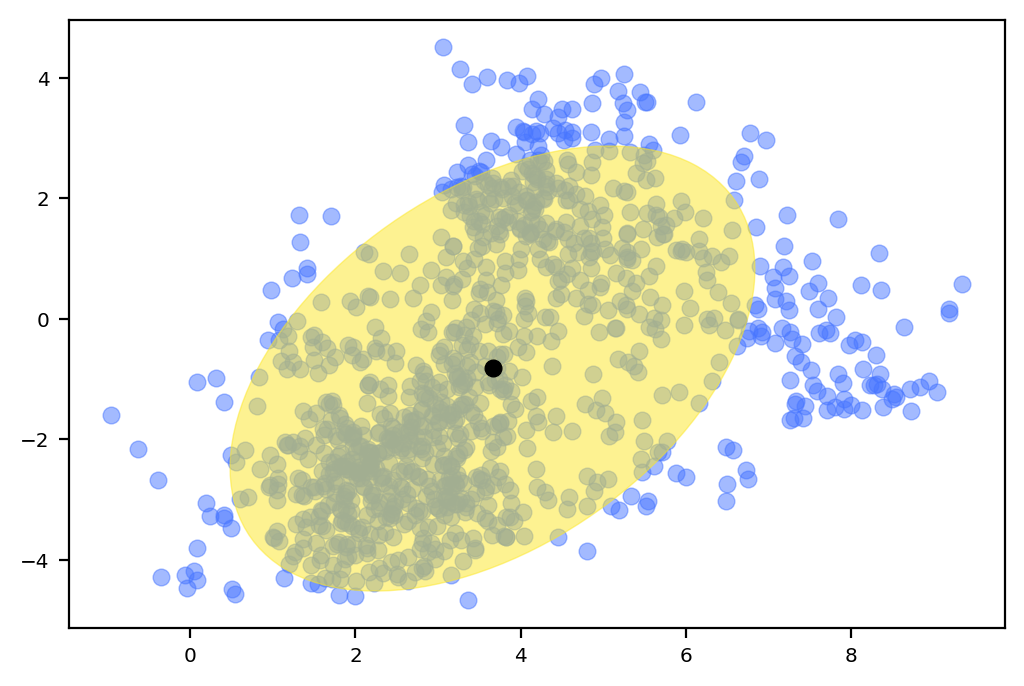

In [36]:
cm = plt.get_cmap("viridis", len(doses))
for i in range(len(doses)):
    fig, ax = plt.subplots()
    plt.scatter(same_ref_with_density[i].obsm['X_umap'][:,0],
                same_ref_with_density[i].obsm['X_umap'][:,1],
                alpha=0.5,
                zorder=1)
    ellipse1 = returnEllipse(same_ref_with_density[i].obsm['X_umap'], color=cm(i), n_std=1.75)
    #print(ellipse1.center, ellipse1.height, ellipse1.width)
    plt.scatter(ellipse1.center[0],
                ellipse1.center[1],
                c='black', zorder=2)
    ax.add_patch(ellipse1)
    plt.show()

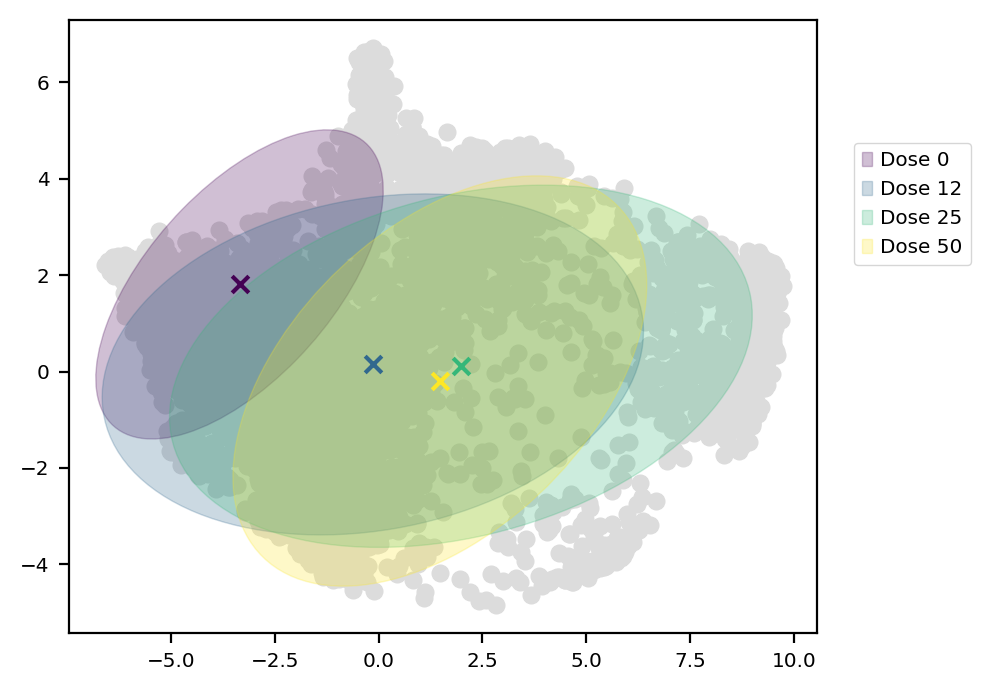

In [111]:
cm = plt.get_cmap("viridis", 4)
fig, ax = plt.subplots(figsize=(5,3.5))
#for i in range(len(doses)):
for i in range(4):
    plt.scatter(same_ref_with_density[i].obsm['X_umap'][:,0],
                same_ref_with_density[i].obsm['X_umap'][:,1],
                #alpha=0.5,
                zorder=1,
                c='gainsboro')
#for i in range(len(doses)):
for i in range(4):
    ellipse1 = returnEllipse(same_ref_with_density[i].obsm['X_umap'], color=cm(i), n_std=1.75, label='Dose ' + str(doses[i]), alpha=0.25)
    plt.scatter(ellipse1.center[0],
                ellipse1.center[1],
                c=cm(i), zorder=2, marker='x')
    #print(ellipse1.center, ellipse1.height, ellipse1.width)
    ax.add_patch(ellipse1)
plt.legend(loc=(1.05,0.6))
plt.tight_layout()
plt.savefig("../../plots/low_doses_ellipses.png", dpi=300)
plt.show()

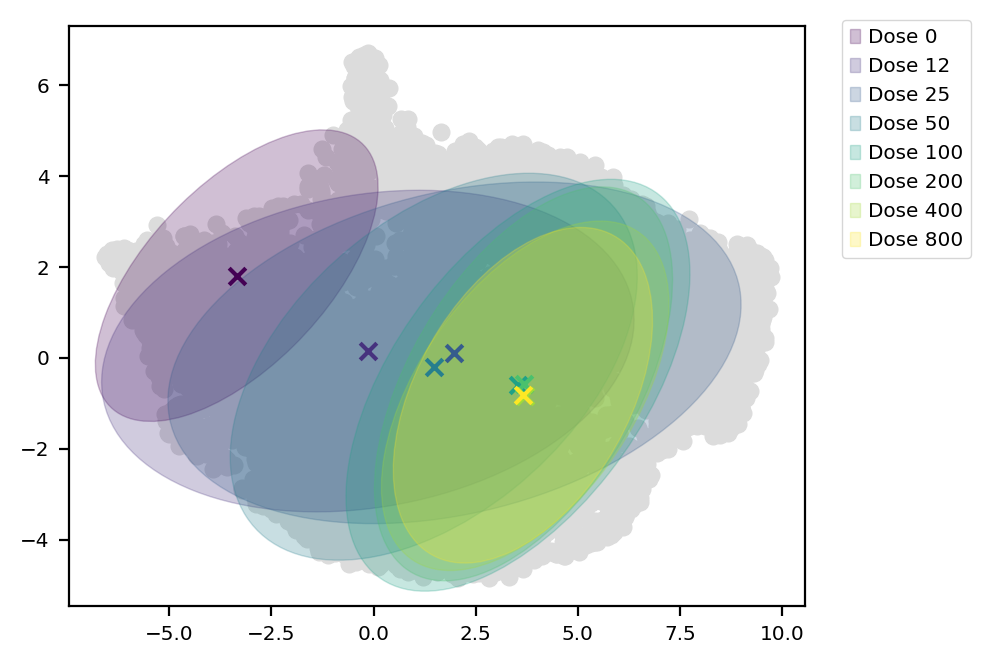

In [110]:
cm = plt.get_cmap("viridis", len(doses))
fig, ax = plt.subplots(figsize=(5,3.5))
#for i in range(len(doses)):
for i in range(len(doses)):
    plt.scatter(same_ref_with_density[i].obsm['X_umap'][:,0],
                same_ref_with_density[i].obsm['X_umap'][:,1],
                #alpha=0.5,
                zorder=1,
                c='gainsboro')
#for i in range(len(doses)):
for i in range(len(doses)):
    ellipse1 = returnEllipse(same_ref_with_density[i].obsm['X_umap'], color=cm(i), n_std=1.75, label='Dose ' + str(doses[i]), alpha=0.25)
    plt.scatter(ellipse1.center[0],
                ellipse1.center[1],
                c=cm(i), zorder=2, marker='x')
    #print(ellipse1.center, ellipse1.height, ellipse1.width)
    ax.add_patch(ellipse1)
plt.legend(loc=(1.05,0.6))
plt.tight_layout()
plt.savefig("../../plots/all_doses_ellipses.png", dpi=300)
plt.show()

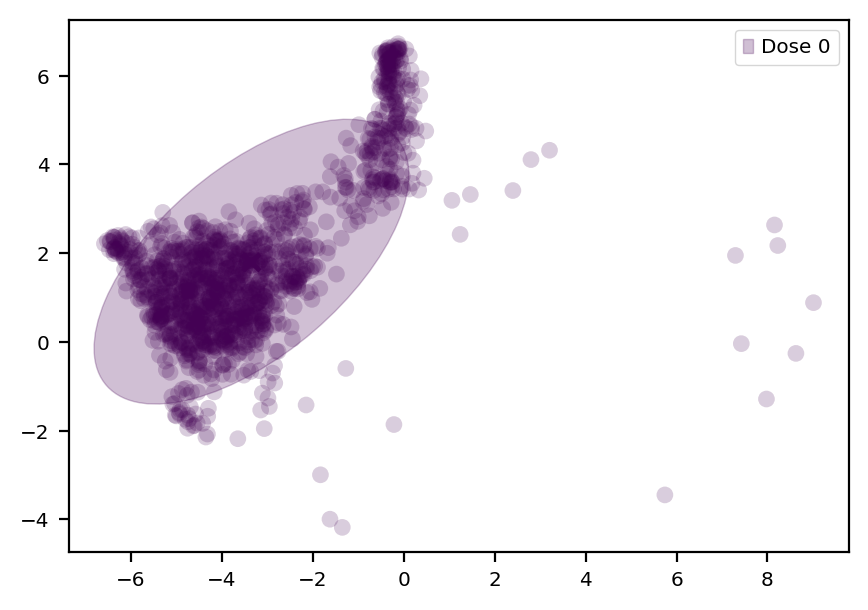

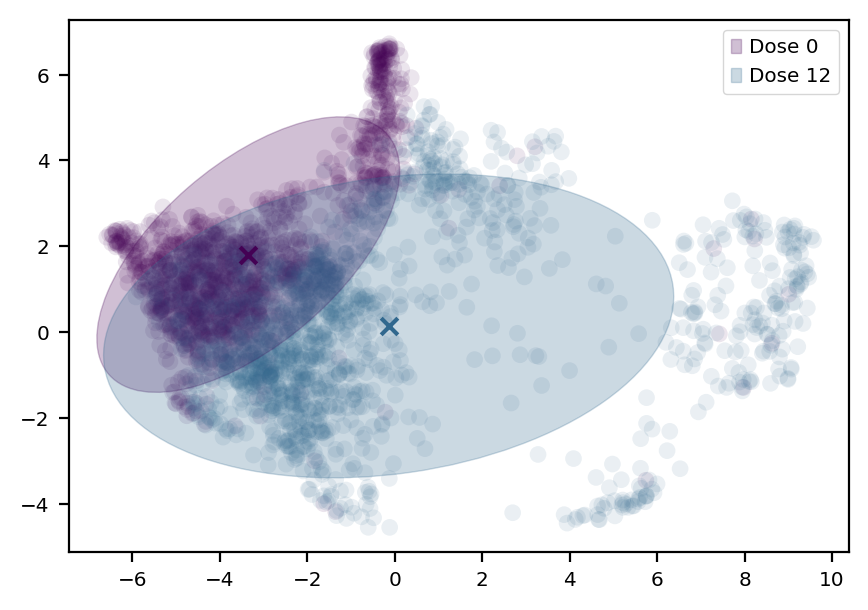

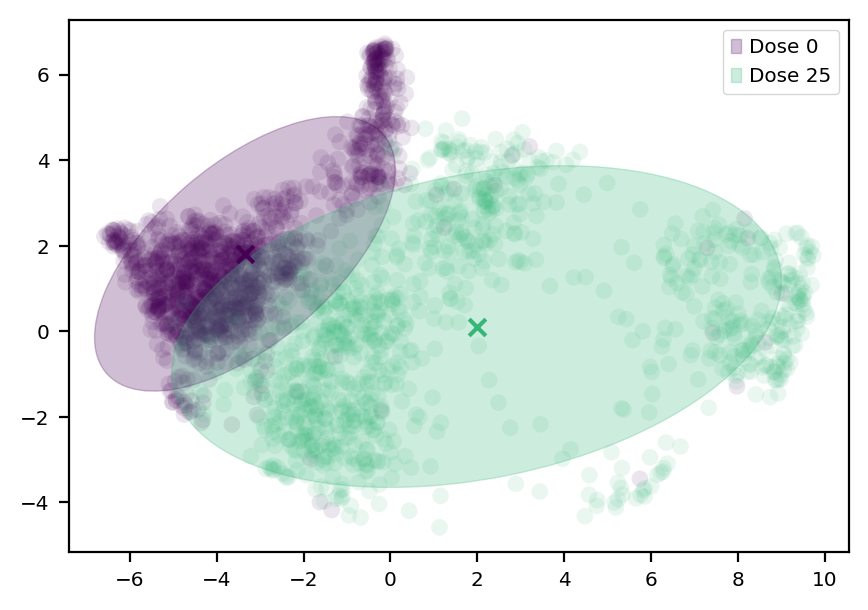

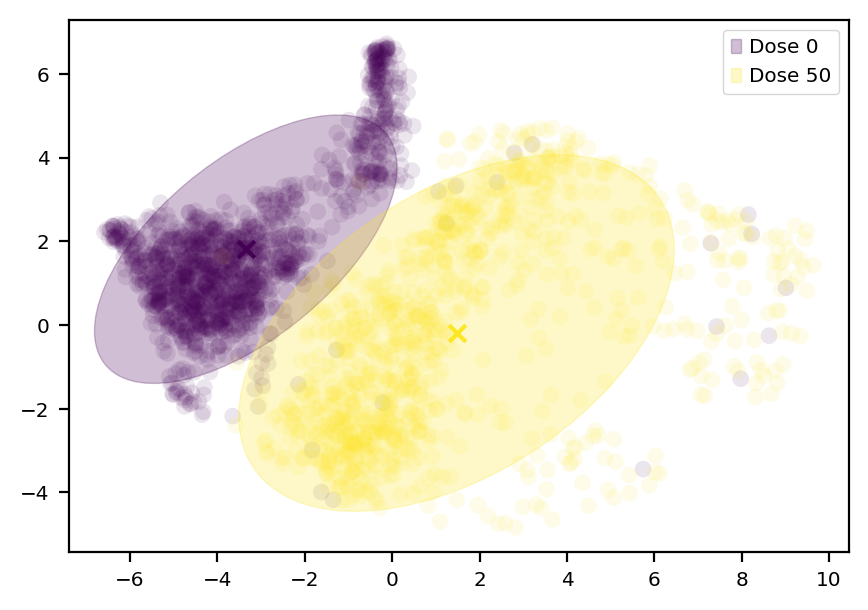

In [101]:
cm = plt.get_cmap("viridis", 4)

for i in range(4):
    fig, ax = plt.subplots(figsize=(5,3.5))
    
    plt.scatter(same_ref_with_density[0].obsm['X_umap'][:,0],
                same_ref_with_density[0].obsm['X_umap'][:,1],
                alpha=0.1,
                zorder=1,
                edgecolor='none',
                c=cm(0))
    plt.scatter(same_ref_with_density[i].obsm['X_umap'][:,0],
                same_ref_with_density[i].obsm['X_umap'][:,1],
                alpha=0.1,
                zorder=1,
                edgecolor='none',
                c=cm(i))
    ellipse1 = returnEllipse(same_ref_with_density[0].obsm['X_umap'], color=cm(0), n_std=1.75, label='Dose ' + str(doses[0]), alpha=0.25)
    ellipse2 = returnEllipse(same_ref_with_density[i].obsm['X_umap'], color=cm(i), n_std=1.75, label='Dose ' + str(doses[i]), alpha=0.25)
    plt.scatter(ellipse1.center[0],
                ellipse1.center[1],
                c=cm(0), zorder=2, marker='x')
    plt.scatter(ellipse2.center[0],
                ellipse2.center[1],
                c=cm(i), zorder=2, marker='x')
    ax.add_patch(ellipse1)
    if i!=0:
        ax.add_patch(ellipse2)
    plt.legend()
    plt.savefig("../../plots/dose_" +str(doses[i])+ "_comp.png", dpi=300)
    plt.show()

area of intersect: 13.562486500518244
intersect/ellipse1: 0.5405020256102268


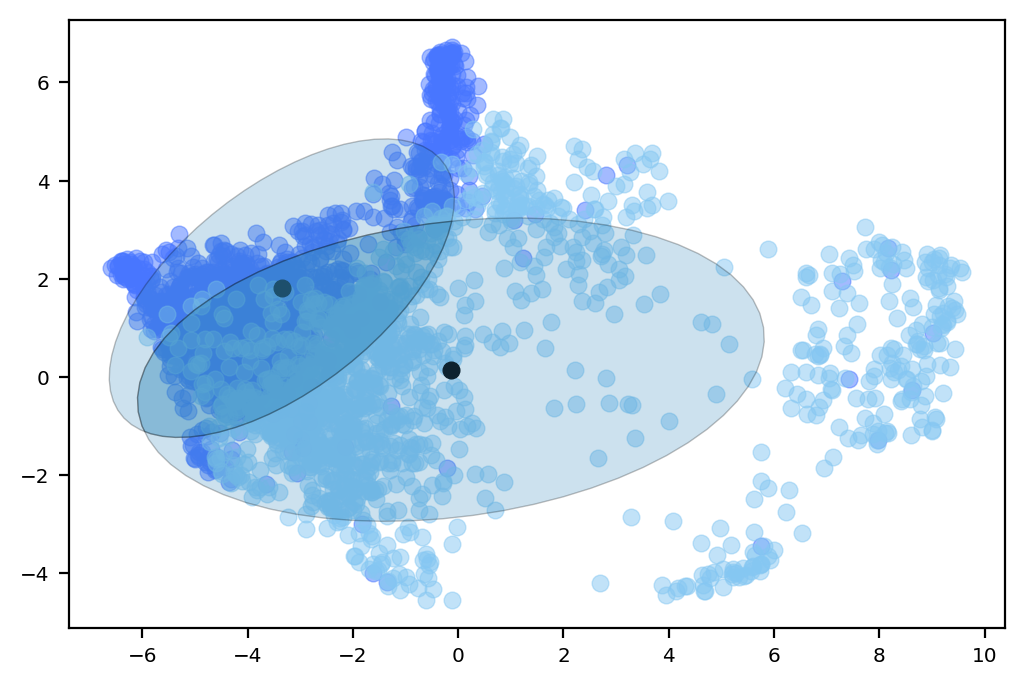

area of intersect: 6.217571263997494
intersect/ellipse1: 0.2477871489448612


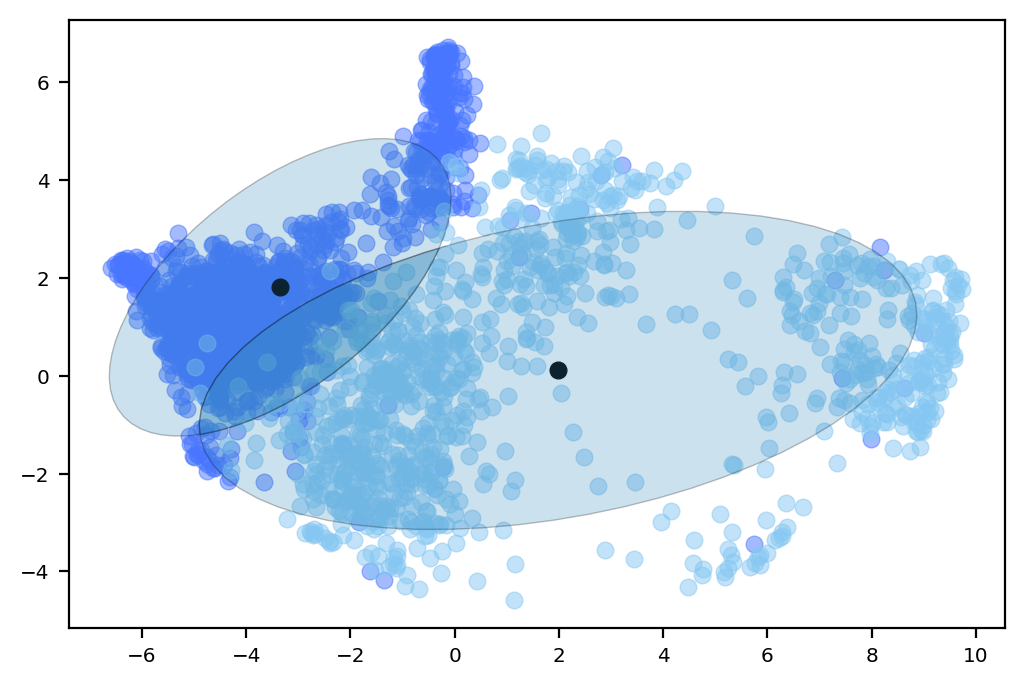

area of intersect: 0.3929291867271799
intersect/ellipse1: 0.015659298266531323


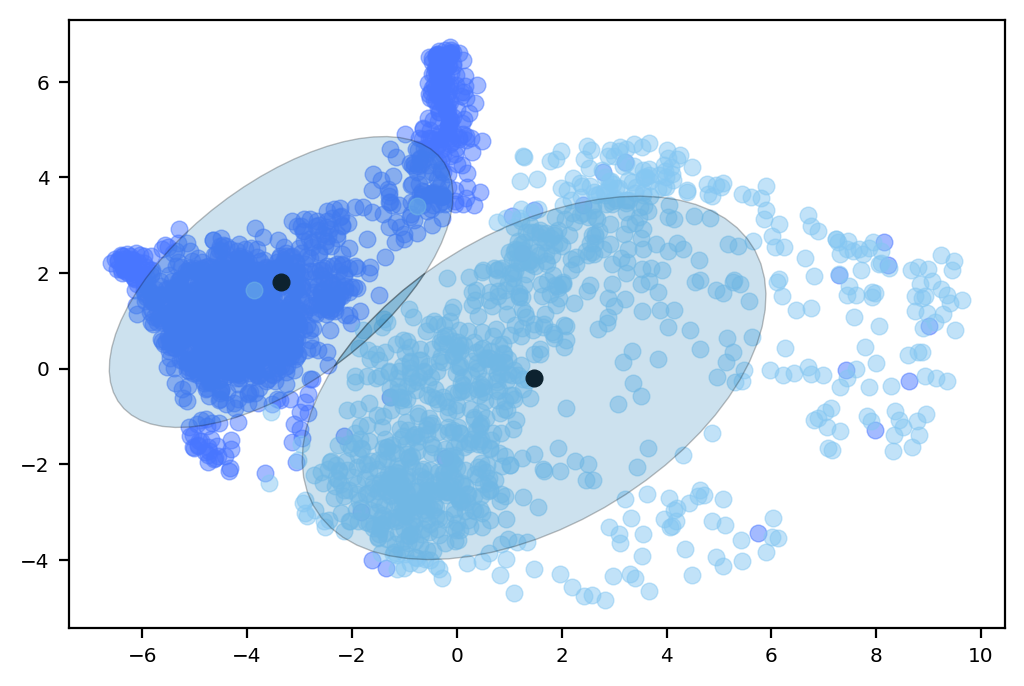

area of intersect: 0.0
intersect/ellipse1: 0.0


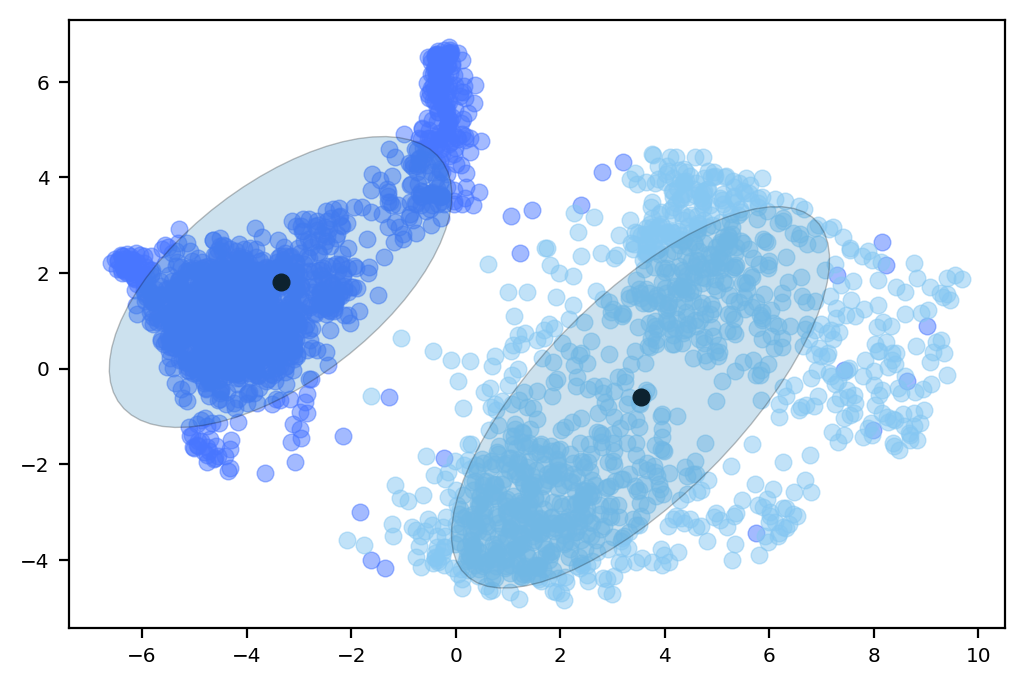

area of intersect: 0.0
intersect/ellipse1: 0.0


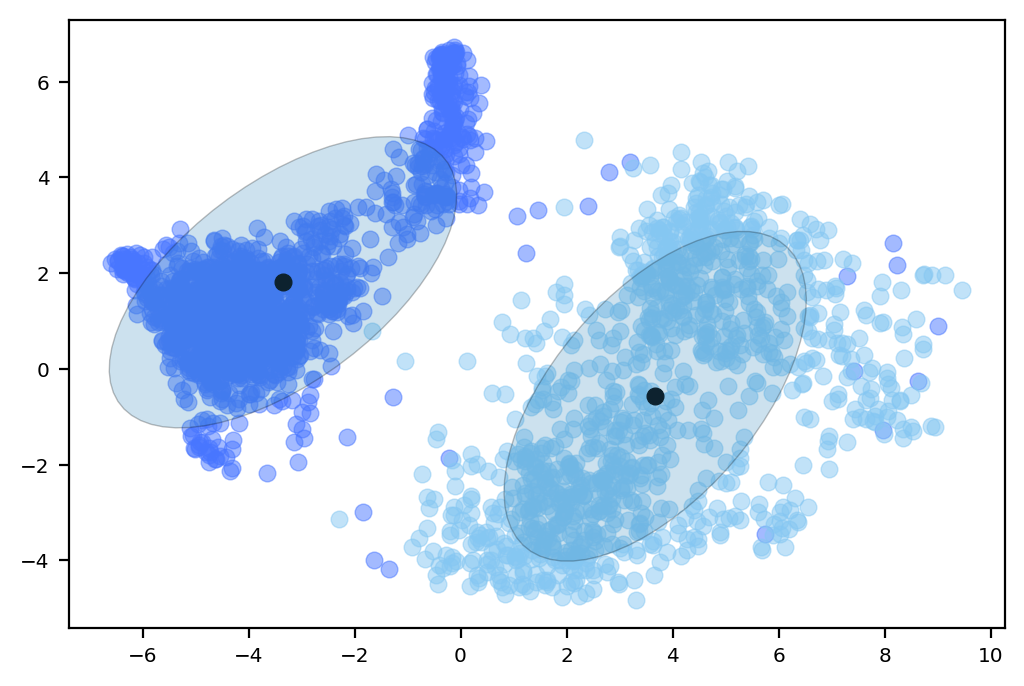

area of intersect: 0.0
intersect/ellipse1: 0.0


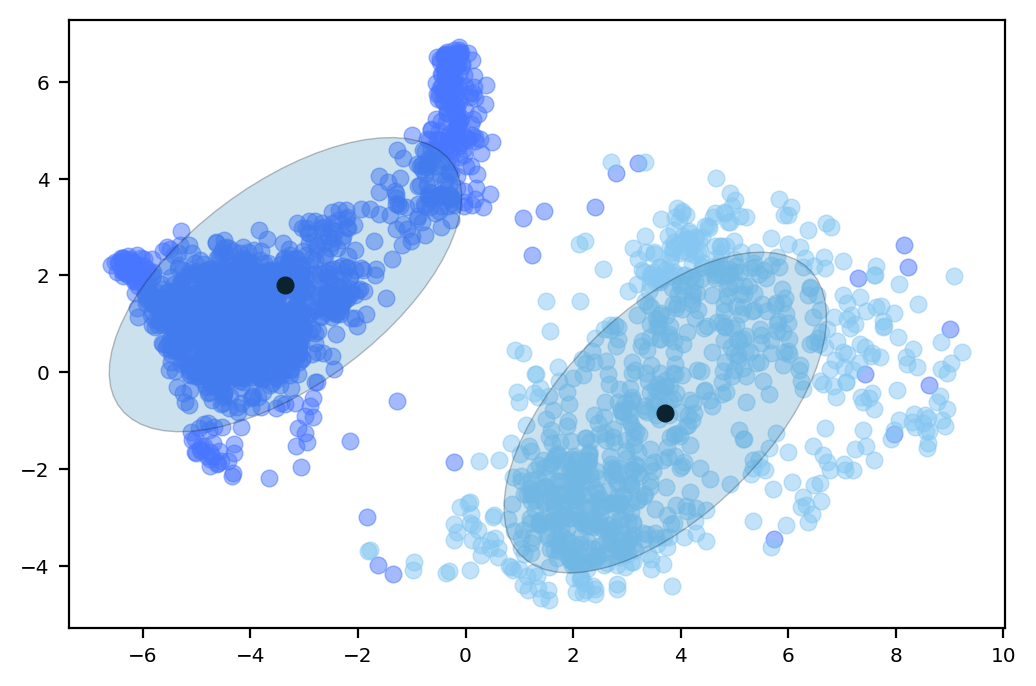

area of intersect: 0.0
intersect/ellipse1: 0.0


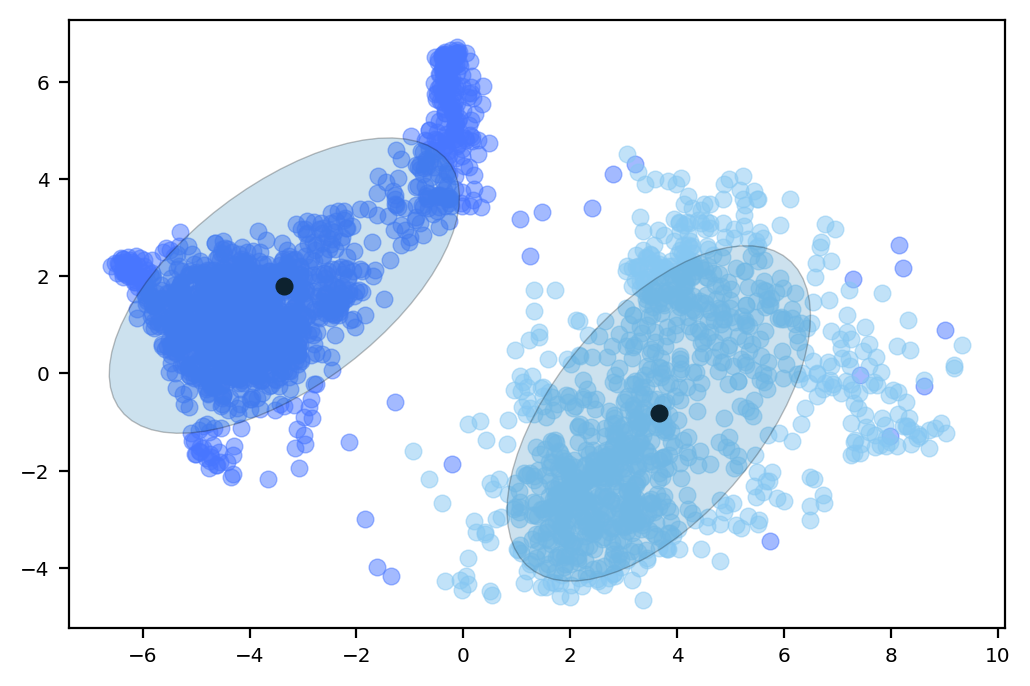

In [95]:
# Plot the data and the confidence ellipse
cm = plt.get_cmap("viridis", 4)
dose_intersection = []
intersect_with_untreated = []

for i in range(1,len(doses)):
    patches = []
    fig, ax = plt.subplots()
    ellipse1 = returnEllipse(same_ref_with_density[0].obsm['X_umap'], color=cm(0), n_std=1.75)
    ellipse1_sh = create_ellipse(ellipse1.center, (ellipse1.width, ellipse1.height), ellipse1.angle)
    verts1 = np.array(ellipse1_sh.exterior.coords.xy)
    patch1 = Polygon(verts1.T, color = 'red', alpha = 0.25)
    #ax.add_patch(patch1)
    patches.append(patch1)
    
    plt.scatter(same_ref_with_density[0].obsm['X_umap'][:,0],
                same_ref_with_density[0].obsm['X_umap'][:,1],
                #c='gainsboro', 
                alpha=0.5,
                zorder=1)
    plt.scatter(same_ref_with_density[i].obsm['X_umap'][:,0],
                same_ref_with_density[i].obsm['X_umap'][:,1],
                #c='gainsboro', 
                alpha=0.5,
                zorder=1)
    plt.scatter(ellipse1.center[0],
                ellipse1.center[1],
                c='black', zorder=2)
    ellipse2 = returnEllipse(same_ref_with_density[i].obsm['X_umap'], color=cm(i), n_std=1.75)
    ellipse2_sh = create_ellipse(ellipse2.center, (ellipse2.width, ellipse2.height), ellipse2.angle)
    verts2 = np.array(ellipse2_sh.exterior.coords.xy)
    patch2 = Polygon(verts2.T, color = cm(i), alpha = 0.25)
    patches.append(patch2)
    #ax.add_patch(patch2)
    
    plt.scatter(ellipse2.center[0],
                ellipse2.center[1],
                c='black', zorder=2)
    
    intersect = ellipse1_sh.intersection(ellipse2_sh)
    verts3 = np.array(intersect.exterior.coords.xy)
    patch3 = Polygon(verts3.T, facecolor = 'none', edgecolor = 'black')
    #ax.add_patch(patch3)
    patches.append(patch3)
    print('area of intersect:',intersect.area)
    print('intersect/ellipse1:', intersect.area/ellipse1_sh.area)
    dose_intersection.append(intersect.area)
    intersect_with_untreated.append(intersect.area/ellipse1_sh.area)
    
    coll=PatchCollection(patches, zorder=3, edgecolor='black', alpha=0.25)
    ax.add_collection(coll)
    plt.show()

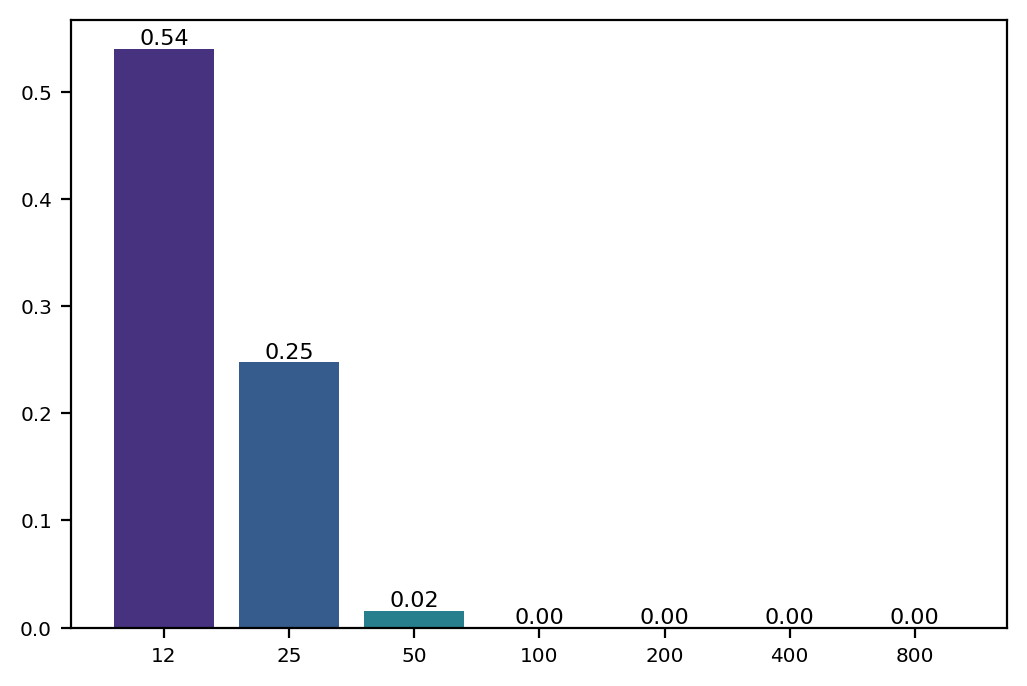

In [96]:
cm = plt.get_cmap("viridis", len(doses))
colors = [cm(i) for i in range(1, len(doses))]
bar1 = plt.bar(range(len(doses)-1), intersect_with_untreated, tick_label=doses[1:], color=colors)
i=0
for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{intersect_with_untreated[i]:.2f}', ha='center', va='bottom')
    i+=1
plt.savefig("../../plots/area_overlap.png", dpi=100)